## Crop Recomendation System using AI/ML

In [1]:
# Importing the libraries needed:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Reading the dataset for the crops:

crop = pd.read_csv("Crop_recommendation.csv")

In [12]:
# Fetching the first 5 dataframes of the 'crop' dataset:

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
# Fetching the last 5 dataframes of the 'crop' dataset:

crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [80]:
# Shape and overall information about the crop dataset:

print('The shape of the dataset is: ', crop.shape)                  # --> It will fetch the total number of rows and columns available in the dataset and return it in the form of a tuple

print()

print(crop.info())                                                 # --> It will return a detailed informative view of the dataset

The shape of the dataset is:  (2200, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [26]:
# Analysing the missing values in the dataset:

crop.isnull()                                     # --> It will return a boolean dataframe having true/false values wherever the specified condition is valid

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [30]:
# We can apply the 'sum()' function to get overall idea about the total number of missing/null values in the dataset:

crop.isnull().sum()                      # --> It will return a dataframe having the 'columns of the dataset' as index and the the 'sum of null values' present in each column as values against the indices. 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [82]:
# Similarly we can also check for duplicate values in the dataset as:

print("Missing Values in Crop Dataset:", crop.duplicated().sum())                   # --> It will return the total no. of duplicates (if present) in the dataset with an integer of 64-bit precision as an output.

Missing Values in Crop Dataset: 0


In [36]:
# To check the statistics of the dataset:

crop.describe()                         # --> It will return a dataframe with the same columns as in the dataset and parameters such as count, mean min, etc as values in the columns.

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [38]:
# Checking the target feature distribution:

crop['label'].value_counts()             # --> It will return a dataframe with 'crop variety' as label and the number of occurences of each crop in the crop variety as values.

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

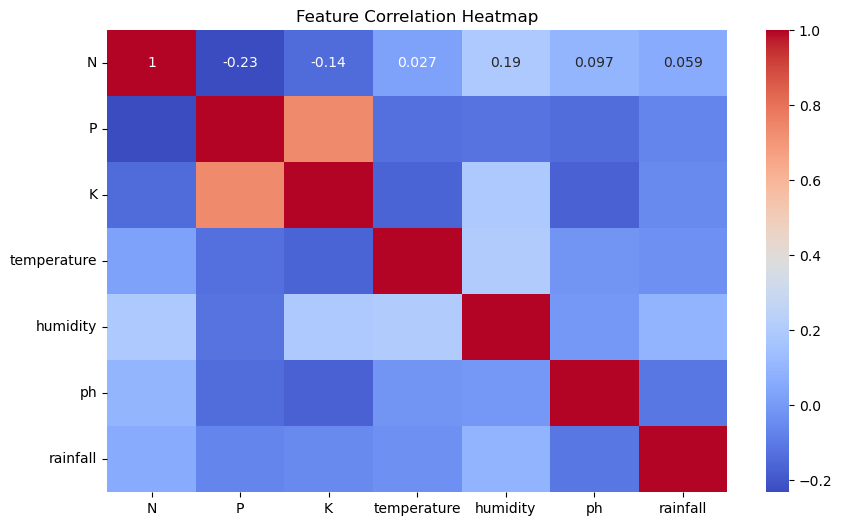

In [96]:
# Visualizing the crop dataset being used for feature selection:

plt.figure(figsize=(10, 6))
sns.heatmap(crop.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [68]:
# Reading the fertilizer dataset:

fertilizer = pd.read_csv("Fertilizer Prediction.csv")

In [74]:
# Fetching the first and last 5 dataframes of the 'crop' dataset:

print(fertilizer.head())              # It will fetch the first 5 dataframes from the dataset

print()

print(fertilizer.tail())             # It will fetch the last 5 dataframes from the dataset

   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

    Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60    

In [78]:
# Shape and overall information about the fertilizer dataset:

print('The shape of the dataset is: ', fertilizer.shape)                  # --> It will fetch the total number of rows and columns available in the dataset and return it in the form of a tuple

print()

print(fertilizer.info())                                                 # --> It will return a overall informative view of the dataset

The shape of the dataset is:  (99, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None


In [92]:
print("Missing Values in Fertilizer Dataset:\n",fertilizer.isnull().sum())     # --> It will return the total number of missing values in the form of dataframe, in the fertilizer dataset for each column as label and the sum of missing values in that column as the values against those labels

Missing Values in Fertilizer Dataset:
 Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [94]:
# To check the statistics of the dataset:

fertilizer.describe()                         # --> It will return a dataframe with the same columns as in the dataset and parameters such as count, mean min, etc as values in the columns.

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


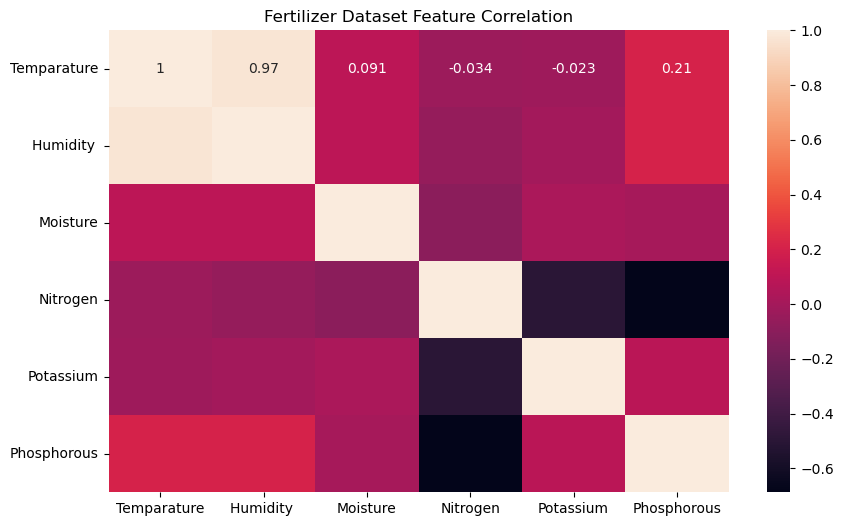

In [100]:
# Visualizing the fertilizer dataset being used for feature selection:

plt.figure(figsize=(10, 6))
sns.heatmap(fertilizer.corr(numeric_only=True), annot=True)
plt.title("Fertilizer Dataset Feature Correlation")
plt.show()